In [ ]:
%matplotlib inline

In [ ]:
'''
Date: 4:30 pm 5th May, 2022
Author: Arup Sarker
Description: Machine Learning Model for Image classification.
Dataset: CIFAR10
Robustness FW: With noise perturbation
'''
import torch
import torchvision
import torchvision.transforms as transforms

## Process CIFAR10 Dataset


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Function to Show IMAGE



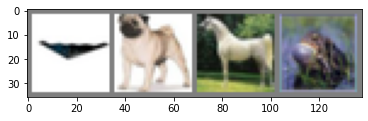

plane dog   horse frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## A simple CNN model for image classification


1.   3 Fully connected layer
2.   2 convolutional layer
3.   1 Max pooling layer



In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CS6316_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cs6316_net = CS6316_Net()

## Enable GPU

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


## Define Loss function and Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cs6316_net.parameters(), lr=0.001, momentum=0.9)

## Train the Model

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cs6316_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.203
[1,  4000] loss: 1.830
[1,  6000] loss: 1.626
[1,  8000] loss: 1.560
[1, 10000] loss: 1.495
[1, 12000] loss: 1.461
[2,  2000] loss: 1.369
[2,  4000] loss: 1.360
[2,  6000] loss: 1.338
[2,  8000] loss: 1.302
[2, 10000] loss: 1.286
[2, 12000] loss: 1.281
[3,  2000] loss: 1.216
[3,  4000] loss: 1.213
[3,  6000] loss: 1.191
[3,  8000] loss: 1.186
[3, 10000] loss: 1.179
[3, 12000] loss: 1.177
[4,  2000] loss: 1.085
[4,  4000] loss: 1.101
[4,  6000] loss: 1.092
[4,  8000] loss: 1.124
[4, 10000] loss: 1.107
[4, 12000] loss: 1.114
[5,  2000] loss: 0.982
[5,  4000] loss: 1.048
[5,  6000] loss: 1.043
[5,  8000] loss: 1.037
[5, 10000] loss: 1.062
[5, 12000] loss: 1.033
[6,  2000] loss: 0.952
[6,  4000] loss: 0.956
[6,  6000] loss: 0.966
[6,  8000] loss: 0.998
[6, 10000] loss: 0.994
[6, 12000] loss: 1.014
[7,  2000] loss: 0.906
[7,  4000] loss: 0.936
[7,  6000] loss: 0.925
[7,  8000] loss: 0.954
[7, 10000] loss: 0.946
[7, 12000] loss: 0.947
[8,  2000] loss: 0.852
[8,  4000] 

## Save the model with state dictionary



In [ ]:
PATH = './cs6316_net.pth'
torch.save(cs6316_net.state_dict(), PATH)

## Print a testloader with ground truth

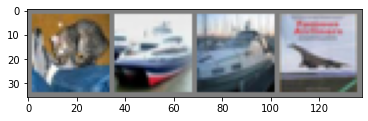

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Verify image iteration



In [ ]:
outputs = cs6316_net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   plane


## Verify the whole testloader as combined accuracy



In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cs6316_net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


## Verify the whole testloader with individual class accuracy

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cs6316_net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.1 %
Accuracy for class: car   is 81.0 %
Accuracy for class: bird  is 49.1 %
Accuracy for class: cat   is 34.6 %
Accuracy for class: deer  is 58.9 %
Accuracy for class: dog   is 61.5 %
Accuracy for class: frog  is 72.3 %
Accuracy for class: horse is 62.3 %
Accuracy for class: ship  is 70.0 %
Accuracy for class: truck is 61.8 %


## Define epsilon for perturbation

In [ ]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
#pretrained_model = "data/lenet_mnist_model.pth"
use_cuda=True

In [ ]:
# Define what device we are using
#print("CUDA Available: ",torch.cuda.is_available())
#device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Initialize the network
#model = Net().to(device)
model = CS6316_Net()

# Load the pretrained model
model.load_state_dict(torch.load(PATH, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

CS6316_Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:

def cs6316_pertubation(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon*sign_data_grad
    if epsilon != 0.0:
      perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

In [ ]:
def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []
    total = 0
    correct1 = 0

    # Loop over all examples in test set
    for image in test_loader:

        # Send the data and label to the device.
        # Arup: I was getting error for running on GPU. Need to cross check the data availability on cuda
        #data, target = data.to(device), target.to(device)
        data, target = image
        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        total += target.size(0)
        correct1 += (init_pred == target).sum().item()

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call cs6316_pertubation
        perturbed_data = cs6316_pertubation(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1]

        correct_pred = (final_pred == target).sum().item()
        if correct_pred != 0:
            correct += correct_pred
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred, final_pred, adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred, final_pred, adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/total
    wfinal_acc = correct1/total
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, total, final_acc))
    print("Without Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct1, total, wfinal_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [ ]:
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, testloader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 9279 / 10000 = 0.9279
Without Epsilon: 0	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.05	Test Accuracy = 4687 / 10000 = 0.4687
Without Epsilon: 0.05	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.1	Test Accuracy = 4110 / 10000 = 0.411
Without Epsilon: 0.1	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.15	Test Accuracy = 3895 / 10000 = 0.3895
Without Epsilon: 0.15	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.2	Test Accuracy = 3740 / 10000 = 0.374
Without Epsilon: 0.2	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.25	Test Accuracy = 3675 / 10000 = 0.3675
Without Epsilon: 0.25	Test Accuracy = 9279 / 10000 = 0.9279
Epsilon: 0.3	Test Accuracy = 3632 / 10000 = 0.3632
Without Epsilon: 0.3	Test Accuracy = 9279 / 10000 = 0.9279


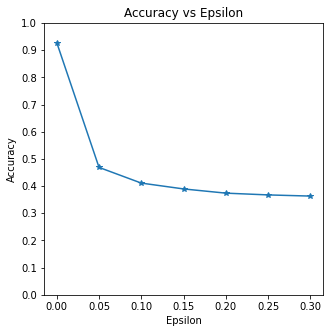

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(len(examples[0]))

5


In [ ]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(576,720))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
        orig,adv,ex = examples[i][j]
        plt.title("{} -> {}".format(orig, adv))
        #plt.imshow(ex, cmap="gray")
        plt.imshow(ex)
plt.tight_layout()
plt.show()